In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [318]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv') 
df_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [319]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [320]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [321]:
df_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002175,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [322]:
(df_train.isnull().sum(axis=0)*100/len(df_train)).sort_values(ascending=False)

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_Status          0.000000
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Loan_ID              0.000000
dtype: float64

In [323]:
df_train.Credit_History.value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [324]:
df_train.Credit_History.fillna(value=df_train.Credit_History.mode()[0],inplace=True)

In [325]:
df_train.Self_Employed.value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [326]:
df_train.Self_Employed.fillna(value=df_train.Self_Employed.mode()[0],inplace=True)

In [327]:
df_train.Dependents.value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [328]:
#Here in case of na values in dependents we are going to delete rows containing Dependents as NAs.
df_train = df_train[~df_train.Dependents.isnull()]
df_train.shape

(599, 13)

In [329]:
len(df_train.Loan_Amount_Term.unique())
df_train.Loan_Amount_Term.value_counts(normalize=True)

360.0    0.856655
180.0    0.073379
480.0    0.022184
300.0    0.022184
84.0     0.006826
240.0    0.005119
120.0    0.005119
36.0     0.003413
60.0     0.003413
12.0     0.001706
Name: Loan_Amount_Term, dtype: float64

In [330]:
df_train.Loan_Amount_Term.fillna(value=df_train.Loan_Amount_Term.mode()[0],inplace=True)

In [331]:
df_train.Gender.fillna(value=df_train.Gender.mode()[0],inplace=True)

In [332]:
round((df_train.isnull().sum(axis=0)/len(df_train))*100,2)

Loan_ID              0.00
Gender               0.00
Married              0.00
Dependents           0.00
Education            0.00
Self_Employed        0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.34
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [333]:
df_train.LoanAmount.describe()

count    579.000000
mean     146.816926
std       86.343049
min        9.000000
25%      100.000000
50%      128.000000
75%      169.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [334]:
df_train= df_train[~df_train.LoanAmount.isnull()]

In [335]:
df_train.isnull().sum(axis=0)/len(df_train)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [336]:
df_train.shape

(579, 13)

Now we will perform logistic regression for this we need to find the variables which impact the loan status

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

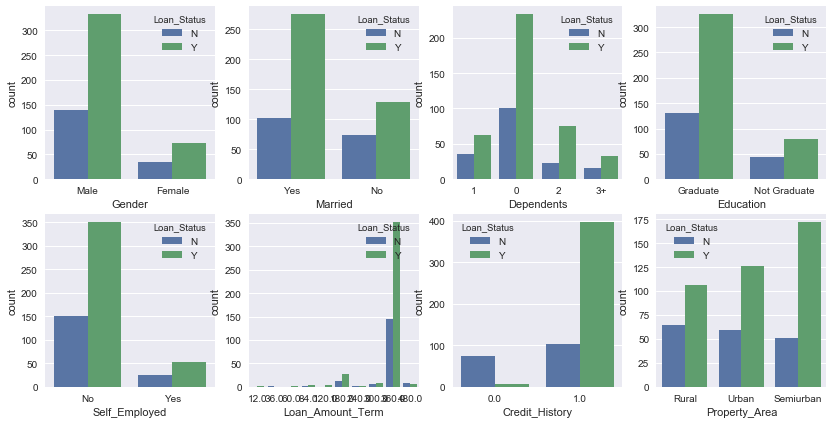

In [338]:
plt.figure(figsize=(14,7))
plt.subplot(2,4,1)
sns.countplot(hue = df_train.Loan_Status, x= df_train.Gender)
plt.subplot(2,4,2)
sns.countplot(hue = df_train.Loan_Status, x= df_train.Married)
plt.subplot(2,4,3)
sns.countplot(hue = df_train.Loan_Status, x= df_train.Dependents)
plt.subplot(2,4,4)
sns.countplot(hue = df_train.Loan_Status, x= df_train.Education)
plt.subplot(2,4,5)
sns.countplot(hue = df_train.Loan_Status, x= df_train.Self_Employed)
plt.subplot(2,4,6)
sns.countplot(hue = df_train.Loan_Status, x= df_train.Loan_Amount_Term)
plt.subplot(2,4,7)
sns.countplot(hue = df_train.Loan_Status, x= df_train.Credit_History)
plt.subplot(2,4,8)
sns.countplot(hue = df_train.Loan_Status, x= df_train.Property_Area)
plt.show()

In [339]:
import pandas as pd
Gender_pd = pd.get_dummies(df_train.Gender)
Gender_pd.head

Gender_pd = Gender_pd[['Female']]

In [340]:
Married_pd = pd.get_dummies(df_train.Married)
Married_pd = Married_pd[['No']]

In [341]:
Dependents_pd = pd.get_dummies(df_train.Dependents)
Dependents_pd = Dependents_pd[['0','1','2']]

#self employed we do not need to convert it into dummy variable it is already in binary form.

In [342]:
yr = df_train.Loan_Amount_Term
yr = yr/12
yr
LAT_pd = pd.get_dummies(yr)
LAT_pd = LAT_pd [[1.0,3.0,5.0,7.0,10.0,15.0,20.0,25.0,30.0]]

In [343]:
CH_pd = pd.get_dummies(df_train.Credit_History)
CH_pd = CH_pd[[0.0]]

In [344]:
#in property area categories are in form of strings so before converting them to dummies convert it into numeric
PA = df_train[['Property_Area']]
PA[PA.Property_Area == 'Rural'] = 0
PA[PA.Property_Area == 'Semiurban'] = 1
PA[PA.Property_Area == 'Urban'] = 2 

# now this is numeric form
PA_pd = pd.get_dummies(PA)
PA_pd = PA_pd[['Property_Area_0','Property_Area_1']]

C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\pandas\core\frame.py:2444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\pandas\core\frame.py:2424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [345]:
LS_pd = pd.get_dummies(df_train.Loan_Status)
LS_pd = LS_pd[['Y']]

Now we can start with the implementation of logistic regression

 we will construct a dataframe containing all the dummy variables

In [346]:
X = pd.concat([Gender_pd,Married_pd,Dependents_pd,LAT_pd, CH_pd, PA_pd], axis=1)
y = LS_pd

In [347]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

LoR = logreg.fit(X,y)
LoR

C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [348]:
pred = LoR.predict(X)


In [349]:
LoR.coef_

array([[-0.00740668, -0.45841172,  0.1156727 , -0.37303568,  0.35881722,
         0.25420358, -0.89283941,  0.5196862 ,  0.21134972,  0.49971288,
         0.93360485,  0.06999325,  0.2618974 ,  0.68725225, -3.35004869,
        -0.36533402,  0.55974153]])

In [350]:
LoR.intercept_

array([ 0.7050552])

In [351]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(y,pred)
AccScore

0.81174438687392059

In [352]:
from sklearn.metrics import confusion_matrix
ConMatrix = confusion_matrix(y,pred)
ConMatrix

array([[ 75, 100],
       [  9, 395]])

In [353]:
from sklearn.metrics import recall_score 
sensitivity = recall_score(y,pred)
sensitivity

0.9777227722772277

In [354]:
from sklearn.metrics import classification_report
c_report = classification_report(y,pred)
c_report

'             precision    recall  f1-score   support\n\n          0       0.89      0.43      0.58       175\n          1       0.80      0.98      0.88       404\n\navg / total       0.83      0.81      0.79       579\n'

In [355]:
from sklearn import metrics
print(metrics.classification_report(y,pred))

             precision    recall  f1-score   support

          0       0.89      0.43      0.58       175
          1       0.80      0.98      0.88       404

avg / total       0.83      0.81      0.79       579



In [356]:
df_train.Loan_Status.value_counts(normalize=True)

Y    0.697755
N    0.302245
Name: Loan_Status, dtype: float64

we will the check the sensitivity and specificity of the model manually through the confusion matrix.

In [357]:
# Here tp=395, fp=100  , tn =75  , fn= 9

#sensitivity = tp/tp+fn  (true positive rate)
sensitivity = 395/(395+9)
sensitivity

0.9777227722772277

In [358]:
#specificity = tn/tn+fp (true negative rate)

specificity = 75/(75+100)
specificity

0.42857142857142855

In [359]:
pred_prob = LoR.predict_proba(X)
pred_prob

array([[ 0.34210272,  0.65789728],
       [ 0.18123833,  0.81876167],
       [ 0.18123833,  0.81876167],
       ..., 
       [ 0.26516927,  0.73483073],
       [ 0.1479054 ,  0.8520946 ],
       [ 0.85171873,  0.14828127]])

In [360]:
from sklearn.metrics import log_loss
loss1 = log_loss(y, pred_prob)
loss1

0.45175983991403806

In [361]:
f1LoR = metrics.f1_score
f1LoR

<function sklearn.metrics.classification.f1_score>

In [362]:
pred_prob.shape

(579, 2)

In [363]:
probof0=pred_prob[:,0]

In [364]:
def defaultpred(y):
        return [0 if y >= 0.5 else 1 for y in probof0]

In [365]:
from sklearn.metrics import confusion_matrix
CMdef = confusion_matrix(y,defaultpred(y))
print(CMdef)

[[ 75 100]
 [  9 395]]


In [366]:
for i in enumerate(np.linspace(0.2,0.8,50,True)):
    def pred(i):
        return[0 if y>=i else 1 for y in probof0]
    

In [367]:
for i in enumerate(np.linspace(0.2,0.8,50,True)):
    def CM(i):
        return[confusion_matrix(y,pred(i))]

In [368]:
for i in enumerate(np.linspace(0.2,0.8,50,True)):
    def accuracy(i):
        return[accuracy_score(y,pred(i))]


In [369]:
y[y == 1].count()
#actual no of ones in the data is 404

Y    404
dtype: int64

In [370]:
y[y == 0].count()
#actual no of ones in the data is 175

Y    175
dtype: int64

In [371]:
#measuring sensitivity (true positive rate)
for i in enumerate(np.linspace(0.2,0.8,50,True)):
    def sensitivity(i):
        return[CM(i)[0][1][1]/404]

In [372]:
#measuring specificity (true negative rate)
for i in enumerate(np.linspace(0.2,0.8,50,True)):
    def specificity(i):
        return[CM(i)[0][0][0]/175]

In [373]:
s = np.linspace(0.2,0.8,50,True)
s

array([ 0.2       ,  0.2122449 ,  0.2244898 ,  0.23673469,  0.24897959,
        0.26122449,  0.27346939,  0.28571429,  0.29795918,  0.31020408,
        0.32244898,  0.33469388,  0.34693878,  0.35918367,  0.37142857,
        0.38367347,  0.39591837,  0.40816327,  0.42040816,  0.43265306,
        0.44489796,  0.45714286,  0.46938776,  0.48163265,  0.49387755,
        0.50612245,  0.51836735,  0.53061224,  0.54285714,  0.55510204,
        0.56734694,  0.57959184,  0.59183673,  0.60408163,  0.61632653,
        0.62857143,  0.64081633,  0.65306122,  0.66530612,  0.67755102,
        0.68979592,  0.70204082,  0.71428571,  0.72653061,  0.73877551,
        0.75102041,  0.76326531,  0.7755102 ,  0.7877551 ,  0.8       ])

In [374]:
def accuracy(t):
    return[accuracy_score(y,pred(t))]


In [375]:
s = s.tolist()


In [376]:
s = pd.DataFrame(s)
type(s)


pandas.core.frame.DataFrame

In [377]:
s.columns = ['probability_cut_off']

In [378]:
for i in s.probability_cut_off:
    def accuracy(i):
        return[accuracy_score(pred(i),y)]

In [379]:
s['accuracy'] = s.probability_cut_off.apply(accuracy)

In [380]:
s['sensitivity'] = s.probability_cut_off.apply(sensitivity)

In [381]:
s['specificity'] = s.probability_cut_off.apply(specificity)

In [382]:
s

,probability_cut_off,accuracy,sensitivity,specificity
0,0.200000,[0.630397236615],[0.544554455446],[0.828571428571]
1,0.212245,[0.649395509499],[0.581683168317],[0.805714285714]
2,0.224490,[0.656303972366],[0.601485148515],[0.782857142857]
3,0.236735,[0.656303972366],[0.606435643564],[0.771428571429]
4,0.248980,[0.689119170984],[0.695544554455],[0.674285714286]
5,0.261224,[0.727115716753],[0.774752475248],[0.617142857143]
6,0.273469,[0.765112262522],[0.844059405941],[0.582857142857]
7,0.285714,[0.770293609672],[0.85396039604],[0.577142857143]
8,0.297959,[0.777202072539],[0.863861386139],[0.577142857143]
9,0.310204,[0.778929188256],[0.866336633663],[0.577142857143]


In [383]:
probability_cut_off_list = np.array(s.probability_cut_off)
probability_cut_off_list

array([ 0.2       ,  0.2122449 ,  0.2244898 ,  0.23673469,  0.24897959,
        0.26122449,  0.27346939,  0.28571429,  0.29795918,  0.31020408,
        0.32244898,  0.33469388,  0.34693878,  0.35918367,  0.37142857,
        0.38367347,  0.39591837,  0.40816327,  0.42040816,  0.43265306,
        0.44489796,  0.45714286,  0.46938776,  0.48163265,  0.49387755,
        0.50612245,  0.51836735,  0.53061224,  0.54285714,  0.55510204,
        0.56734694,  0.57959184,  0.59183673,  0.60408163,  0.61632653,
        0.62857143,  0.64081633,  0.65306122,  0.66530612,  0.67755102,
        0.68979592,  0.70204082,  0.71428571,  0.72653061,  0.73877551,
        0.75102041,  0.76326531,  0.7755102 ,  0.7877551 ,  0.8       ])

In [384]:
accuracy_nplist = np.array(s.accuracy)
np.shape(accuracy_nplist)
accuracy_list = np.concatenate( accuracy_nplist, axis=0 )
accuracy_list

array([ 0.63039724,  0.64939551,  0.65630397,  0.65630397,  0.68911917,
        0.72711572,  0.76511226,  0.77029361,  0.77720207,  0.77892919,
        0.77892919,  0.7806563 ,  0.8134715 ,  0.8134715 ,  0.81865285,
        0.81865285,  0.81865285,  0.82037997,  0.81865285,  0.81865285,
        0.81692573,  0.8134715 ,  0.8134715 ,  0.8134715 ,  0.81174439,
        0.81174439,  0.8134715 ,  0.8134715 ,  0.8134715 ,  0.8134715 ,
        0.8134715 ,  0.8134715 ,  0.8134715 ,  0.8134715 ,  0.81174439,
        0.81174439,  0.81174439,  0.81174439,  0.81174439,  0.81174439,
        0.81174439,  0.81174439,  0.81174439,  0.81174439,  0.80483592,
        0.80483592,  0.80656304,  0.80656304,  0.79965458,  0.79792746])

In [385]:
sensitivity_nplist = np.array(s.sensitivity)
np.shape(sensitivity_nplist)
sensitivity_list = np.concatenate( sensitivity_nplist, axis=0 )
sensitivity_list

array([ 0.54455446,  0.58168317,  0.60148515,  0.60643564,  0.69554455,
        0.77475248,  0.84405941,  0.8539604 ,  0.86386139,  0.86633663,
        0.86633663,  0.86881188,  0.95792079,  0.95792079,  0.97029703,
        0.97029703,  0.97029703,  0.97277228,  0.97524752,  0.97524752,
        0.97524752,  0.97772277,  0.97772277,  0.97772277,  0.97772277,
        0.98019802,  0.98267327,  0.98267327,  0.98267327,  0.98267327,
        0.98267327,  0.98267327,  0.98267327,  0.98267327,  0.98267327,
        0.98267327,  0.98267327,  0.98267327,  0.98267327,  0.98267327,
        0.98267327,  0.98267327,  0.98267327,  0.98267327,  0.98267327,
        0.98267327,  0.98514851,  0.98514851,  0.98514851,  0.98514851])

In [386]:
specificity_nplist = np.array(s.specificity)
np.shape(specificity_nplist)
specificity_list = np.concatenate( specificity_nplist, axis=0 )
specificity_list

array([ 0.82857143,  0.80571429,  0.78285714,  0.77142857,  0.67428571,
        0.61714286,  0.58285714,  0.57714286,  0.57714286,  0.57714286,
        0.57714286,  0.57714286,  0.48      ,  0.48      ,  0.46857143,
        0.46857143,  0.46857143,  0.46857143,  0.45714286,  0.45714286,
        0.45142857,  0.43428571,  0.43428571,  0.43428571,  0.42857143,
        0.42285714,  0.42285714,  0.42285714,  0.42285714,  0.42285714,
        0.42285714,  0.42285714,  0.42285714,  0.42285714,  0.41714286,
        0.41714286,  0.41714286,  0.41714286,  0.41714286,  0.41714286,
        0.41714286,  0.41714286,  0.41714286,  0.41714286,  0.39428571,
        0.39428571,  0.39428571,  0.39428571,  0.37142857,  0.36571429])

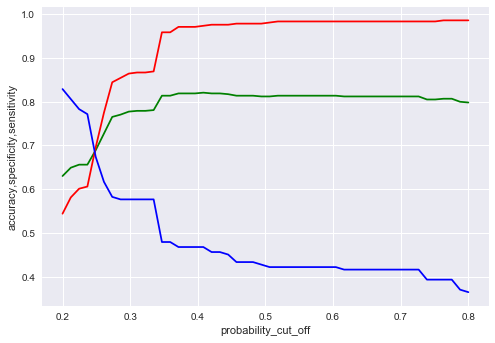

In [387]:
import matplotlib.pyplot as plt
plt.plot(probability_cut_off_list, accuracy_list, color='green')
plt.plot(probability_cut_off_list, sensitivity_list, color='red')
plt.plot(probability_cut_off_list, specificity_list, color = 'blue')
plt.xlabel('probability_cut_off')
plt.ylabel('accuracy,specificity,sensitivity')
plt.show()

zooming in the region of intersection using plt.axis([xmin, xmax, ymin,ymax])

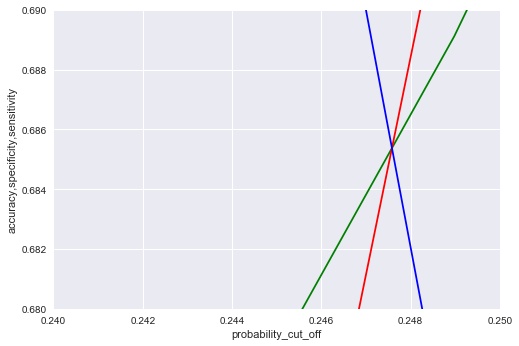

In [388]:
import matplotlib.pyplot as plt
plt.plot(probability_cut_off_list, accuracy_list, color='green')
plt.plot(probability_cut_off_list, sensitivity_list, color='red')
plt.plot(probability_cut_off_list, specificity_list, color = 'blue')
plt.xlabel('probability_cut_off')
plt.ylabel('accuracy,specificity,sensitivity')
plt.axis([0.24, 0.25, 0.68, 0.69])
plt.show()

The point of intersection is the optimum solution i.e it gives the value where accuracy, sensitivity and specificity are optimum.

In [389]:
acc_sen_diff=accuracy_list - sensitivity_list
acc_sen_diff = abs(acc_sen_diff)
acc_sen_diff

array([ 0.08584278,  0.06771234,  0.05481882,  0.04986833,  0.00642538,
        0.04763676,  0.07894714,  0.08366679,  0.08665931,  0.08740745,
        0.08740745,  0.08815558,  0.14444929,  0.14444929,  0.15164418,
        0.15164418,  0.15164418,  0.15239231,  0.15659468,  0.15659468,
        0.15832179,  0.16425127,  0.16425127,  0.16425127,  0.16597839,
        0.16845363,  0.16920176,  0.16920176,  0.16920176,  0.16920176,
        0.16920176,  0.16920176,  0.16920176,  0.16920176,  0.17092888,
        0.17092888,  0.17092888,  0.17092888,  0.17092888,  0.17092888,
        0.17092888,  0.17092888,  0.17092888,  0.17092888,  0.17783734,
        0.17783734,  0.17858548,  0.17858548,  0.18549394,  0.18722105])

In [390]:
acc_spe_diff = abs(accuracy_list - specificity_list)
acc_spe_diff

array([ 0.19817419,  0.15631878,  0.12655317,  0.1151246 ,  0.01483346,
        0.10997286,  0.18225512,  0.19315075,  0.20005922,  0.20178633,
        0.20178633,  0.20351345,  0.3334715 ,  0.3334715 ,  0.35008142,
        0.35008142,  0.35008142,  0.35180854,  0.36150999,  0.36150999,
        0.36549716,  0.37918579,  0.37918579,  0.37918579,  0.38317296,
        0.38888724,  0.39061436,  0.39061436,  0.39061436,  0.39061436,
        0.39061436,  0.39061436,  0.39061436,  0.39061436,  0.39460153,
        0.39460153,  0.39460153,  0.39460153,  0.39460153,  0.39460153,
        0.39460153,  0.39460153,  0.39460153,  0.39460153,  0.41055021,
        0.41055021,  0.41227733,  0.41227733,  0.42822601,  0.43221318])

In [391]:
sen_spe_diff = abs(sensitivity_list - specificity_list)
sen_spe_diff

array([ 0.28401697,  0.22403112,  0.18137199,  0.16499293,  0.02125884,
        0.15760962,  0.26120226,  0.27681754,  0.28671853,  0.28919378,
        0.28919378,  0.29166902,  0.47792079,  0.47792079,  0.5017256 ,
        0.5017256 ,  0.5017256 ,  0.50420085,  0.51810467,  0.51810467,
        0.52381895,  0.54343706,  0.54343706,  0.54343706,  0.54915134,
        0.55734088,  0.55981612,  0.55981612,  0.55981612,  0.55981612,
        0.55981612,  0.55981612,  0.55981612,  0.55981612,  0.56553041,
        0.56553041,  0.56553041,  0.56553041,  0.56553041,  0.56553041,
        0.56553041,  0.56553041,  0.56553041,  0.56553041,  0.58838755,
        0.58838755,  0.5908628 ,  0.5908628 ,  0.61371994,  0.61943423])

In [393]:
np.array(np.where(acc_sen_diff<0.05))

array([[3, 4, 5]], dtype=int64)

In [394]:
np.array(np.where(acc_spe_diff<0.05))

array([[4]], dtype=int64)

In [395]:
np.array(np.where(sen_spe_diff<0.05))

array([[4]], dtype=int64)

from the above 3 code outputs we can say at the 5th point of the probability cut-off the 3 measures are approx equal

In [396]:
accuracy_list[4]

0.68911917098445596

In [397]:
 sensitivity_list[4]

0.6955445544554455

In [398]:
specificity_list[4]

0.67428571428571427

In [399]:
probability_cut_off_list[4]

0.24897959183673471

the probability cut_off is 0.2489795918367347 for optimal solution. The accuracy, sensitivity and specificity are 0.68911917098445596, 0.6955445544554455 and 0.67428571428571427.

Considering the logistic model with probability cut off 0.24897959183673471 as our final model we apply logistic regression to the test data.

# Test Data

In [400]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [401]:
df_test.Dependents.value_counts(normalize=True)

0     0.560224
2     0.165266
1     0.162465
3+    0.112045
Name: Dependents, dtype: float64

In [402]:
df_test.Dependents.fillna(value='3+',inplace=True)

In [403]:
df_test.Self_Employed.fillna(value=df_test.Self_Employed.mode()[0],inplace=True)

In [404]:
normalrangeLoanAmount=df_test.LoanAmount[df_test.LoanAmount<df_test.LoanAmount.quantile(0.99)]
df_test.LoanAmount.fillna(value=normalrangeLoanAmount.mean(),inplace=True)

In [405]:
df_test.Loan_Amount_Term.value_counts(normalize=True)
df_test.Loan_Amount_Term.fillna(value=df_test.Loan_Amount_Term.mode()[0],inplace=True)

In [406]:
df_test.Credit_History.fillna(value=df_test.Credit_History.mode()[0],inplace=True)

In [407]:
df_test.Property_Area.fillna(value=df_test.Property_Area.mode()[0],inplace=True)

In [408]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [409]:
import pandas as pd
Gender_t = pd.get_dummies(df_test.Gender)
Gender_t.head

Gender_t = Gender_t[['Female']]

In [410]:
Married_t = pd.get_dummies(df_test.Married)
Married_t= Married_t[['No']]

In [411]:
Dependents_t = pd.get_dummies(df_test.Dependents)
Dependents_t = Dependents_t[['0','1','2']]

In [412]:
yr = df_test.Loan_Amount_Term
yr = yr/12
yr
LAT_t = pd.get_dummies(yr)
LAT_t= LAT_t [[1.0,3.0,5.0,7.0,10.0,15.0,20.0,25.0,30.0]]

In [413]:
CH_t= pd.get_dummies(df_test.Credit_History)
CH_t= CH_t[[0.0]]

In [414]:
#in property area categories are in form of strings so before converting them to dummies convert it into numeric
PA_t = df_test[['Property_Area']]
PA_t[PA_t.Property_Area == 'Rural'] = 0
PA_t[PA_t.Property_Area == 'Semiurban'] = 1
PA_t[PA_t.Property_Area == 'Urban'] = 2 

# now this is numeric form
PA_t = pd.get_dummies(PA_t)
PA_t = PA_t[['Property_Area_0','Property_Area_1']]

C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\pandas\core\frame.py:2444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\pandas\core\frame.py:2424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [415]:
X_test = pd.concat([Gender_t.reset_index(drop=True),Married_t.reset_index(drop=True),Dependents_t.reset_index(drop=True),LAT_t.reset_index(drop=True), CH_t.reset_index(drop=True), PA_t.reset_index(drop=True)], axis=1)

Now we apply the logistic regression model on X_test.

In [416]:
test_prediction_prob = LoR.predict_proba(X_test)

In [417]:
prob_of_0=test_prediction_prob[:,0]

In [418]:
prob = pd.DataFrame(prob_of_0)
prob.columns = ['probability_of_0']


In [419]:
def prediction(t):
        return [0 if t >= 0.24897959183673471 else 1]

In [420]:
prob['prediction'] = prob.probability_of_0.apply(prediction)
prob['prediction']
prediction_list = np.array(prob.prediction)
prediction_list = np.concatenate( prediction_list, axis=0 )

In [421]:
predictiondf = pd.DataFrame(prediction_list)

In [422]:
predictiondf.columns = ['predictions']
predictiondf.predictions.value_counts()

1    203
0    164
Name: predictions, dtype: int64

203 applicants's loan status is predicted passed and 164 is predicted to be failed.